## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [2]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [3]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/mikolaj3/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [5]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [6]:
df

,Tweet,Sentiment
0,Aww too bad :(,0
1,This actually made me cry this is so disgustin...,0
2,"Waiting patiently for mr. crush :) but first, ...",1
3,@TikoSD Hi! Would you like an @imPastel concer...,1
4,@GFuelEnergy i want that but i dont have paypa...,0
...,...,...
9995,@glennlondey @CarltonFC looking that way :(,0
9996,so I guess blocking number on phones spam SMS ...,0
9997,@jackiHS What an absolute cutie - congratulati...,1
9998,@CallmeLexine Same Mommy :(,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [7]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [8]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
7099,@twcxmina shit :(,0
598,@AdoreDelano are u there too? :( http://t.co/P...,0
2750,Only my bad would remind me to exercise at 1:1...,1
7711,@izzkamilhalda lols. :D,1
4843,@triangledarren thank you :),1
...,...,...
4112,SNAPCHAT : TammiRossM #snapchat #kikgirl #kikc...,0
182,I can't feel tomorrow :(,0
5600,@theemilygrayxo Mmmmm if i wasn't at work i wo...,0
8786,Homebound. :D HAHAHAYS.,1


In [9]:
test

,Tweet,Sentiment
2788,@mr__cooke @CCWeekUK Thank you! We're set to h...,1
7644,@hansolotto with SCoups^^ they are for 17 like...,1
8075,@SP4NKO Aww love it. My kind of men :)),1
1431,@ShadEO9 No worries! Let us know how it goes :...,1
3430,💓🚮👯- the definition of perfection would have a...,1
...,...,...
8956,@safirahasnaerdy follback?:)) x,1
7062,can my mum stop picking on my clothes please :-(,0
1311,I went on at 10:59 and stayed on at 11.00 unti...,0
945,@nuriaagonzalez it was amazing!! Such a short ...,0


Positive words


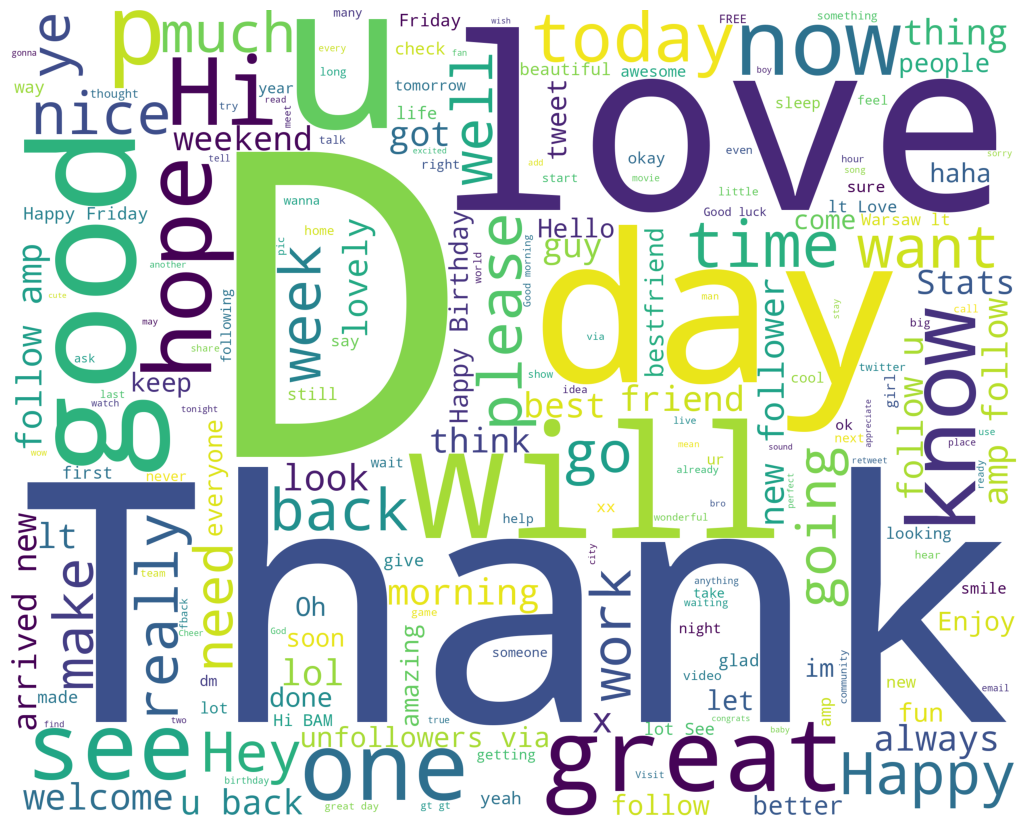

Negative words


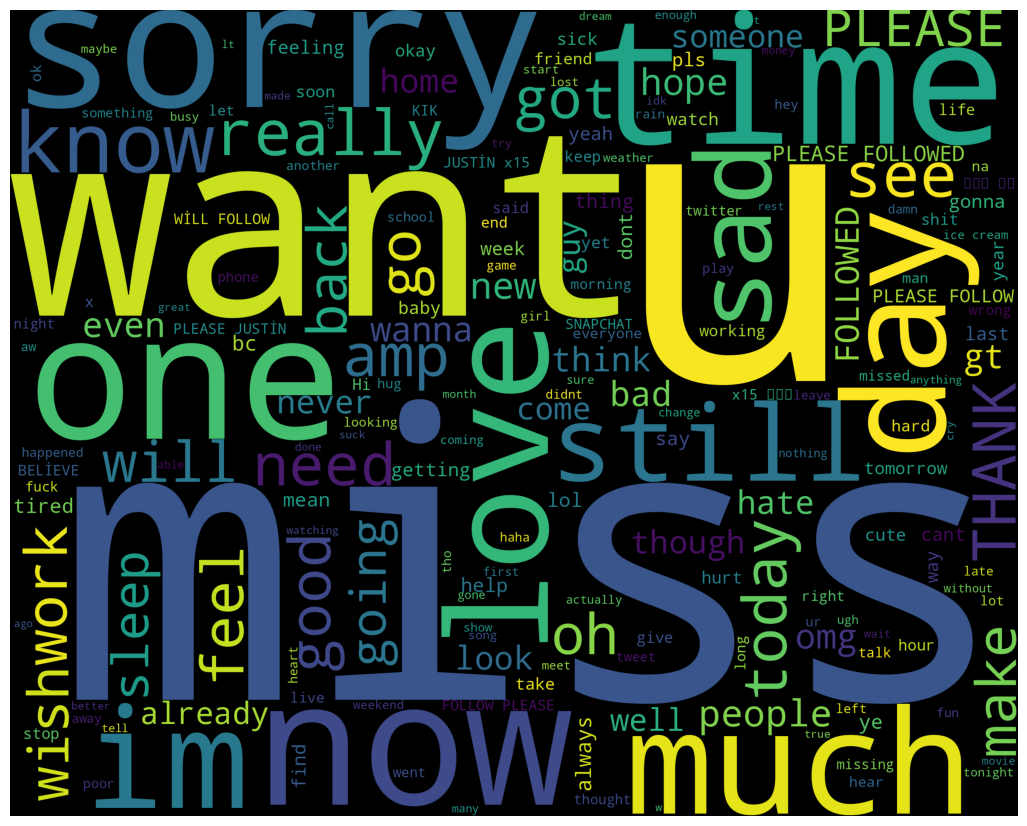

In [10]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mikolaj3/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:

tweets = []
stopwords_set = set(stopwords.words("english"))
tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True, reduce_len=True)


for index, row in train.iterrows():
    tweets.append((tokenizer.tokenize(row.Tweet), row.Sentiment))


test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [13]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [48]:
tc = nltk.text.TextCollection(tweets)

tokenizer = nltk.tokenize.TweetTokenizer()

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in document_words:
        features[word] = tc.tf_idf(word, document)
    return features

In [40]:
tweets

[(['shit'], 0),
 ([], 0),
 (['bad',
   'would',
   'remind',
   'exercise',
   '1:12',
   ':-)',
   'miss',
   'needs',
   'come',
   'back'],
  1),
 (['lols'], 1),
 (['thank'], 1),
 (['sisters', 'best', 'best', 'pre', 'bday', 'celebration'], 1),
 (['...', 'switch', ':-('], 0),
 (['beautiful', 'via', 'disney.arts', 'talented', 'elmoprinssi', 'forget'], 1),
 (['got', 'netfilx', 'today', 'whoop', 'whoop'], 1),
 (['always', 'hard', 'leaving', 'heart', "i'mo", 'sulk', 'day', 'today'], 0),
 (["they're", 'addictive', 'beautiful', 'flowers', 'humphrey', 'cute'], 1),
 (['love', 'big', '...', 'juicy', '...', 'selfies'], 1),
 (['please', 'click', 'link', 'checkout'], 1),
 (['hungry'], 0),
 (['thought',
   'today',
   'pizza',
   'day',
   'sadly',
   'none',
   'managers',
   'usually',
   'buy'],
  0),
 (['lucky'], 0),
 (['sorted', 'thanks', 'daaru', 'party', 'chaddi', 'bros'], 1),
 (['visit', 'blog', 'thanks'], 1),
 (['justin', 'come', 'scotland'], 0),
 (['think', 'fifth', 'album', 'okay', 'fu

In [41]:
wordcloud_draw(w_features)

KeyboardInterrupt: 

In [59]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)
#classifier = nltk.classify.DecisionTreeClassifier(training_set)

In [60]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 527/513 
[Positive]: 473/454 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [61]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[513  14]
 [ 19 454]]


In [ ]:
tweets

In [18]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [62]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


F1 Score: 0.9669902309940904
Recall: 0.967
Precision: 0.9670289987789988


In [53]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.967


In [54]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.765
F1 Score: 0.7646277812696417
Recall: 0.765
Precision: 0.764933870550998
Confusion Matrix:
 [[420 107]
 [128 345]]


In [22]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.624
F1 Score: 0.5885211088339984
Recall: 0.624
Precision: 0.7247860264167971
Confusion Matrix:
 [[177 350]
 [ 26 447]]


In [23]:
# prompt: add sentiment analysis with Vader library

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
                                                  Tweet  \
7099                                  @twcxmina shit :(   
598   @AdoreDelano are u there too? :( http://t.co/P...   
2750  Only my bad would remind me to exercise at 1:1...   
7711                            @izzkamilhalda lols. :D   
4843                       @triangledarren thank you :)   
...                                                 ...   
4112  SNAPCHAT : TammiRossM #snapchat #kikgirl #kikc...   
182                            I can't feel tomorrow :(   
5600  @theemilygrayxo Mmmmm if i wasn't at work i wo...   
8786                            Homebound. :D HAHAHAYS.   
6073  http://t.co/a5rmka5axn thanks for following!! ...   

                                       Sentiment Scores  Compound Score  \
7099  {'neg': 0.867, 'neu': 0.133, 'pos': 0.0, 'comp...         -0.7579   
598   {'neg': 0.326, 'neu': 0.67